## CHAPTER 3






### a. A range normalization that generates data in the range (0, 1)

In [1]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
  
# create an array
values = np.array([42,47,59,27,84,49,72,43,73,59,58,82,50,79,89,75,70,59,67,35]).reshape(-1,1)
  
range_scaler = MinMaxScaler()
range_normalized_values = range_scaler.fit_transform(values)
  

print(np.round(range_normalized_values,2))

[[0.24]
 [0.32]
 [0.52]
 [0.  ]
 [0.92]
 [0.35]
 [0.73]
 [0.26]
 [0.74]
 [0.52]
 [0.5 ]
 [0.89]
 [0.37]
 [0.84]
 [1.  ]
 [0.77]
 [0.69]
 [0.52]
 [0.65]
 [0.13]]


### b. A range normalization that generates data in the range (-1, 1)

In [2]:
values = [42,47,59,27,84,49,72,43,73,59,58,82,50,79,89,75,70,59,67,35]
  
mx= max(values)
mn = min(values)

high= 1
low = -1

normalised_val= []

for i in values:
    sol= (i-mn)/(mx-mn)
    sol= sol*(high-low)
    sol= sol +low
    sol= round(sol,2)
    normalised_val.append(sol)

print(normalised_val)

[-0.52, -0.35, 0.03, -1.0, 0.84, -0.29, 0.45, -0.48, 0.48, 0.03, 0.0, 0.77, -0.26, 0.68, 1.0, 0.55, 0.39, 0.03, 0.29, -0.74]


### c. A standardization of the data

In [3]:
import numpy as np
import pandas as pd
  
# create an array
values = np.array([42,47,59,27,84,49,72,43,73,59,58,82,50,79,89,75,70,59,67,35]).reshape(-1,1)
  
scaled_df= pd.DataFrame(values, columns=["val"])

mean = scaled_df['val'].mean()
stdev = scaled_df['val'].std()
scaled_df=scaled_df.assign(norm_score= lambda x: (x['val'] - mean)/stdev)
norm_df=scaled_df[['norm_score']].copy(deep=True)
print(norm_df)

    norm_score
0    -1.098428
1    -0.808605
2    -0.113031
3    -1.967896
4     1.336083
5    -0.692676
6     0.640508
7    -1.040464
8     0.698473
9    -0.113031
10   -0.170995
11    1.220154
12   -0.634712
13    1.046260
14    1.625905
15    0.814402
16    0.524579
17   -0.113031
18    0.350685
19   -1.504180


### a. An equal-width binning using 5 bins.

In [4]:
values= [92,107,83,101,107,92,99,119,93,106,105,88,106,90,97,118,120,72,100,104]

In [5]:
mx= max(values)
mn= min(values)
bin_number=5
bin_size= (mx-mn) / bin_number


In [6]:
import pandas as pd 

bins= {"bin1":[72.0,81.6], "bin2": [81.6,91.2], "bin3":[91.2,100.8], "bin4":[100.8,110.4], "bin5":[110.4,120.0]}

In [7]:
df_bins= pd.DataFrame(bins)
df_bins= df_bins.T
df_bins

,0,1
bin1,72.0,81.6
bin2,81.6,91.2
bin3,91.2,100.8
bin4,100.8,110.4
bin5,110.4,120.0


In [8]:
# creating bins by using apply function from pandas
df= pd.DataFrame(values, columns= ["val"])
def f(x):
    if x>= 72.0 and x< 81.6:
        return "bin1"
    elif x>= 81.6 and x< 91.2:
        return "bin2"
    elif x>= 91.2 and x< 100.8:
        return "bin3"
    elif x>= 100.8 and x< 110.4:
        return "bin4"
    else:
        return "bin5"
df["bins"]= df.val.apply(f)

In [9]:
df

,val,bins
0,92,bin3
1,107,bin4
2,83,bin2
3,101,bin4
4,107,bin4
5,92,bin3
6,99,bin3
7,119,bin5
8,93,bin3
9,106,bin4


In [10]:
# creating bins by using pandas.cut function
df['bin_cut'] = pd.cut(df.val, bins=5,labels=["bin1","bin2","bin3","bin4","bin5"])
df

,val,bins,bin_cut
0,92,bin3,bin3
1,107,bin4,bin4
2,83,bin2,bin2
3,101,bin4,bin4
4,107,bin4,bin4
5,92,bin3,bin3
6,99,bin3,bin3
7,119,bin5,bin5
8,93,bin3,bin3
9,106,bin4,bin4


<AxesSubplot:ylabel='Count'>

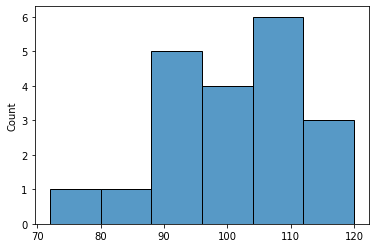

In [11]:
import seaborn as sns

sns.histplot(values) # the below graph shows values before binning

Text(0, 0.5, 'Count')

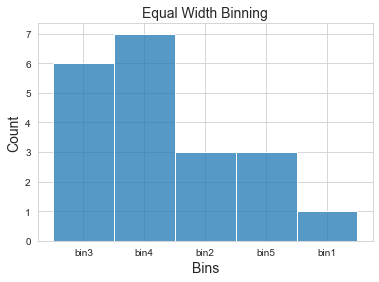

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
sns.histplot(x=df.bins, data= df) 
plt.title("Equal Width Binning", size= 14)
plt.xlabel("Bins", size= 14)
plt.ylabel("Count", size= 14)
# below graphs shows smoothening of the graph using bins of equal width. 

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'Bins'), Text(0.5, 1.0, 'Equal width binning')]

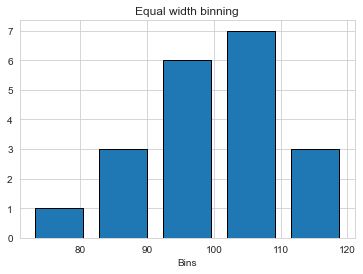

In [13]:
seabrn = sns.distplot(values,bins=5, kde=False, hist_kws={"rwidth":0.75,'edgecolor':'black', 'alpha':1.0})
seabrn.set(xlabel = "Bins" , title ='Equal width binning')
# below graphs shows smoothening of the graph using bins of equal width. 

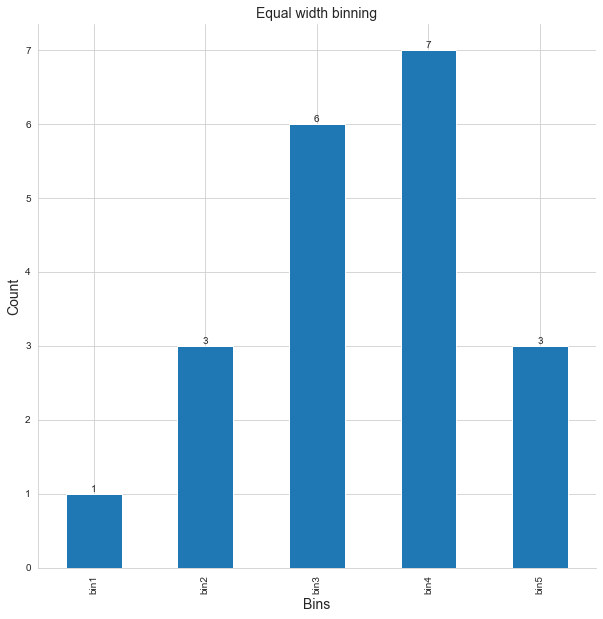

In [14]:
fig,ax=plt.subplots(1,1,figsize=(10,10))
df_bin=pd.cut(df['val'],bins=5,labels=['bin1','bin2','bin3','bin4','bin5'])
axes=df_bin.value_counts().sort_index(ascending = True).plot(kind='bar')
plt.title('Equal width binning', size= 14)
plt.xlabel('Bins', size= 14)
plt.ylabel('Count', size= 14)
axes.bar_label(ax.containers[0])
sns.despine()

### b. An equal-frequency binning using 5 bins

In [15]:
df_freq= pd.DataFrame(values, columns= ["val"])
df_freq["qcut"]= pd.qcut(df.val, q=5,labels=['bin1','bin2','bin3','bin4','bin5'])
df_freq= df_freq.sort_values("val")
df_freq

,val,qcut
17,72,bin1
2,83,bin1
11,88,bin1
13,90,bin1
0,92,bin2
5,92,bin2
8,93,bin2
14,97,bin2
6,99,bin3
18,100,bin3


In [16]:
df_freq.loc[16,'qcut'] = 'bin5'

Text(0, 0.5, 'Count')

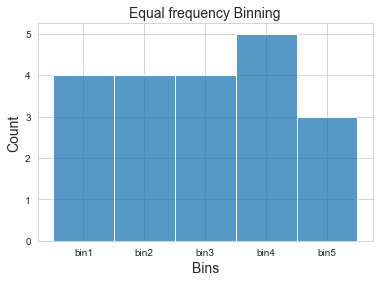

In [17]:
import seaborn as sns
sns.set_style('whitegrid')
sns.histplot(x=df_freq.qcut, data= df_freq)
plt.title("Equal frequency Binning", size= 14)
plt.xlabel("Bins", size= 14)
plt.ylabel("Count", size= 14)
# below graphs shows uniform distribution of the bins which further smoothen the data. 

## Based on the data “housing.csv” we demo at our lecture, could you  apply whatever data exploration tools to explain, visualize, and provide your insights for this  dataset? We will judge your answer based on how deeper insights you can present.


In [18]:
housing= pd.read_csv(r'/Users/iqrabismi/Desktop/housing (1).csv')

In [19]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


#### checking duplicate values 

In [20]:
housing.duplicated().value_counts() # hence there is no duplicate values 

False    20640
dtype: int64

#### checking the dtypes and null values 

In [21]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [22]:
housing.dtypes 

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [23]:
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [24]:
print('Percentage of missing data:',round((housing.isna().sum().sum()/housing.shape[0])*100,5),'%')

Percentage of missing data: 1.00291 %


In [25]:
housing=housing.dropna().reset_index(drop=True) ##dropping the null values

In [26]:
# if the percentage of null values had been more than we can use simpleimputer from sklearn to fill the numm values
#by default simple imputer replaces nulls with mean values.

from sklearn.impute import SimpleImputer

imp= SimpleImputer()
impval= imp.fit_transform(housing.total_bedrooms.values.reshape(-1,1))
df_imp= pd.DataFrame(impval)
df_imp.isnull().sum()

0    0
dtype: int64

#### seperating the continous and categorical variables

In [27]:
numeric_data = housing.select_dtypes(include=[np.number])
categorical_data = housing.select_dtypes(exclude=[np.number])

In [28]:
numeric_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...,...,...
20428,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20429,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20430,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20431,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


In [29]:
categorical_data

,ocean_proximity
0,NEAR BAY
1,NEAR BAY
2,NEAR BAY
3,NEAR BAY
4,NEAR BAY
...,...
20428,INLAND
20429,INLAND
20430,INLAND
20431,INLAND


In [30]:
# Hence from the two dfs above we can see that only one value is categorical rest all values are numeric 

#### Measuring of Central Tendency, Dispersion and Variability

In [31]:
mean=numeric_data.mean(axis=0)
mean

longitude               -119.570689
latitude                  35.633221
housing_median_age        28.633094
total_rooms             2636.504233
total_bedrooms           537.870553
population              1424.946949
households               499.433465
median_income              3.871162
median_house_value    206864.413155
dtype: float64

In [32]:
median=numeric_data.median(axis=0)
median

longitude               -118.4900
latitude                  34.2600
housing_median_age        29.0000
total_rooms             2127.0000
total_bedrooms           435.0000
population              1166.0000
households               409.0000
median_income              3.5365
median_house_value    179700.0000
dtype: float64

In [33]:
mode=numeric_data.mode(axis=0)
mode.loc[0]

longitude               -118.310
latitude                  34.060
housing_median_age        52.000
total_rooms             1527.000
total_bedrooms           280.000
population               891.000
households               306.000
median_income              3.125
median_house_value    500001.000
Name: 0, dtype: float64

In [34]:
mn=numeric_data.min(axis=0)
mn

longitude              -124.3500
latitude                 32.5400
housing_median_age        1.0000
total_rooms               2.0000
total_bedrooms            1.0000
population                3.0000
households                1.0000
median_income             0.4999
median_house_value    14999.0000
dtype: float64

In [35]:
mx=numeric_data.max(axis=0)
mx

longitude               -114.3100
latitude                  41.9500
housing_median_age        52.0000
total_rooms            39320.0000
total_bedrooms          6445.0000
population             35682.0000
households              6082.0000
median_income             15.0001
median_house_value    500001.0000
dtype: float64

In [36]:
range=mx-mn
range

longitude                 10.0400
latitude                   9.4100
housing_median_age        51.0000
total_rooms            39318.0000
total_bedrooms          6444.0000
population             35679.0000
households              6081.0000
median_income             14.5002
median_house_value    485002.0000
dtype: float64

In [37]:
stdev=numeric_data.std(axis=0)
stdev

longitude                  2.003578
latitude                   2.136348
housing_median_age        12.591805
total_rooms             2185.269567
total_bedrooms           421.385070
population              1133.208490
households               382.299226
median_income              1.899291
median_house_value    115435.667099
dtype: float64

In [38]:
var=median=numeric_data.var(axis=0)
var

longitude             4.014324e+00
latitude              4.563981e+00
housing_median_age    1.585536e+02
total_rooms           4.775403e+06
total_bedrooms        1.775654e+05
population            1.284161e+06
households            1.461527e+05
median_income         3.607307e+00
median_house_value    1.332539e+10
dtype: float64

In [39]:
def find_iqr(x):
    return np.subtract(*np.percentile(x,[75,25]))
housing.select_dtypes([np.number]).apply(find_iqr)

longitude                  3.7900
latitude                   3.7900
housing_median_age        19.0000
total_rooms             1693.0000
total_bedrooms           351.0000
population               935.0000
households               324.0000
median_income              2.1803
median_house_value    145200.0000
dtype: float64

In [40]:
perc =[.20, .40, .60, .80]
numeric_data.describe(percentiles = perc)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
20%,-121.980000,33.870000,17.000000,1299.000000,269.400000,710.000000,254.000000,2.352420,107300.000000
40%,-119.940000,34.100000,25.000000,1837.000000,377.000000,1007.000000,356.000000,3.140920,157300.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
60%,-118.300000,36.670000,33.000000,2461.000000,502.000000,1347.000000,471.000000,3.968800,209400.000000
80%,-117.890000,37.810000,40.000000,3481.000000,718.600000,1905.000000,666.000000,5.109860,290000.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [41]:
numeric_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [42]:
categorical_data.describe()

,ocean_proximity
count,20433
unique,5
top,<1H OCEAN
freq,9034


#### histograms and pair plot


array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

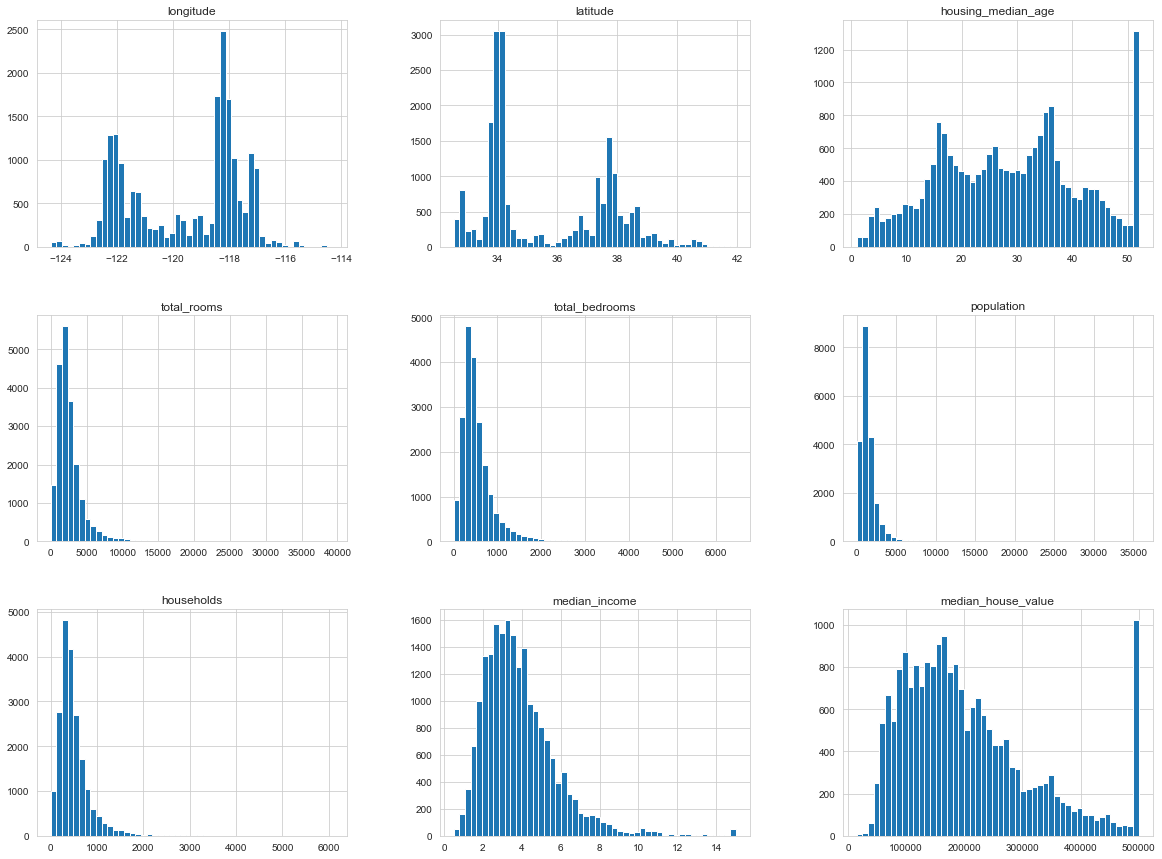

In [43]:
housing.hist(bins=50, figsize=(20,15))

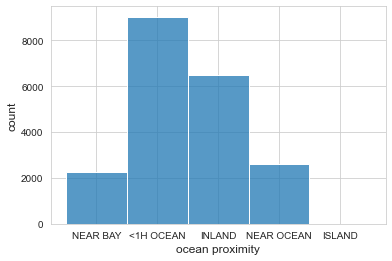

In [44]:
sns.histplot(categorical_data.ocean_proximity)
plt.xlabel("ocean proximity", size=12)
plt.ylabel("count", size=12)
plt.show()

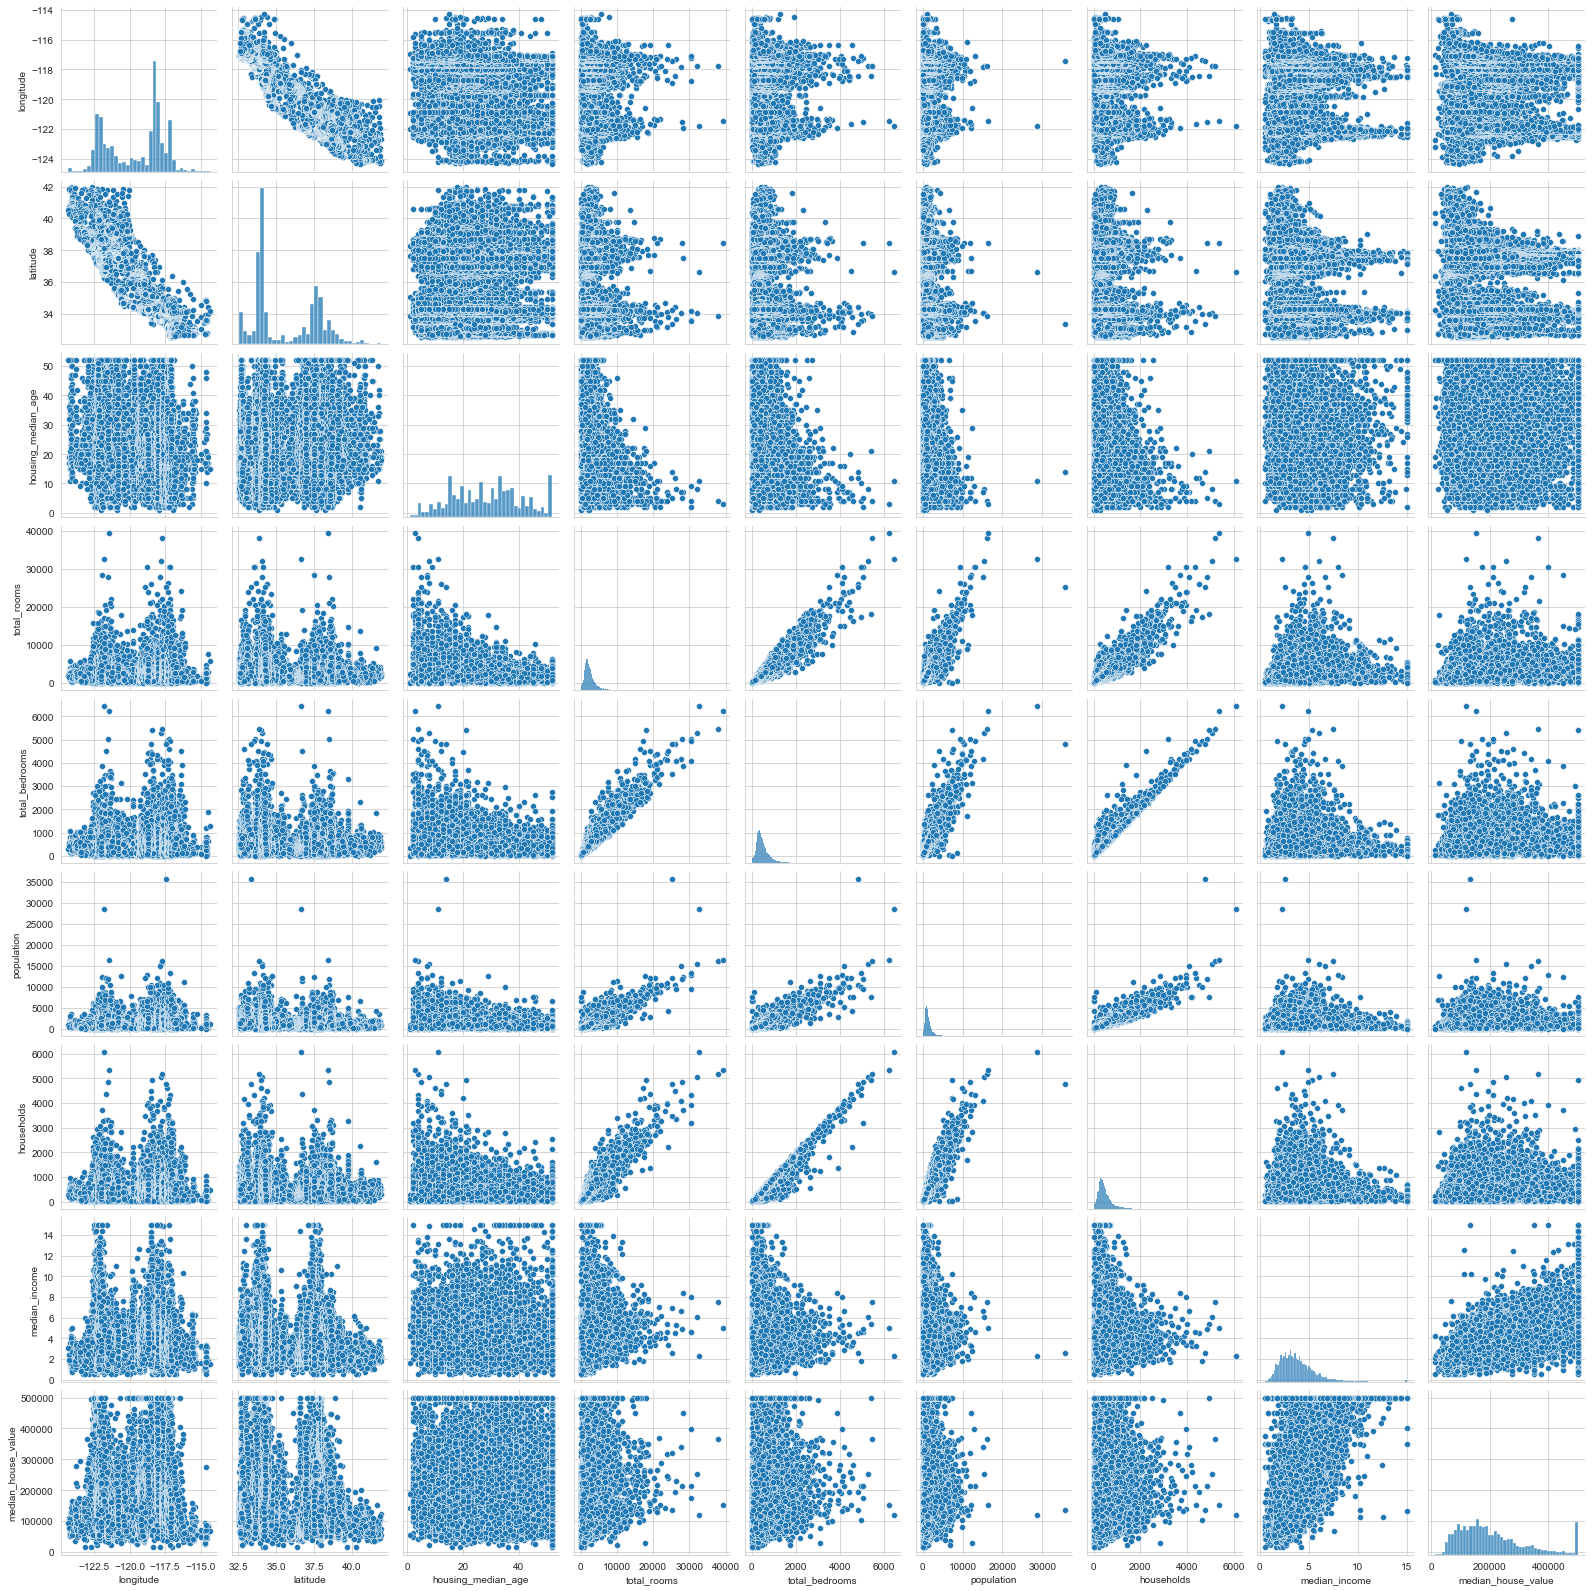

In [45]:
sns.pairplot(housing)

plt.show()

In [46]:
x= numeric_data.iloc[:,:-1]
x

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462
...,...,...,...,...,...,...,...,...
20428,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603
20429,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568
20430,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000
20431,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672


In [47]:
y= pd.DataFrame(numeric_data.iloc[:,-1])
y

,median_house_value
0,452600.0
1,358500.0
2,352100.0
3,341300.0
4,342200.0
...,...
20428,78100.0
20429,77100.0
20430,92300.0
20431,84700.0


## checking for outliers and relation 

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


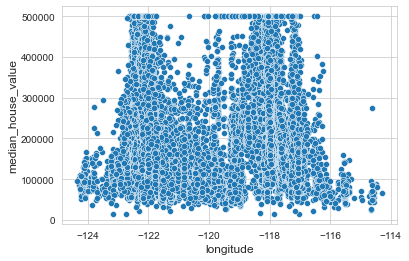

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


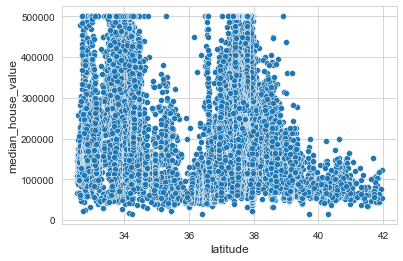

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


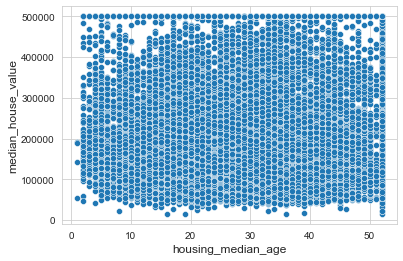

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


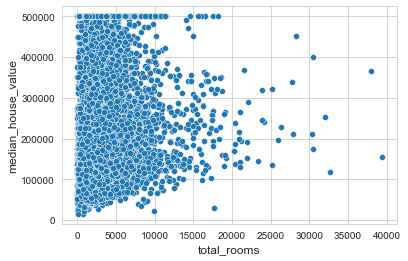

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


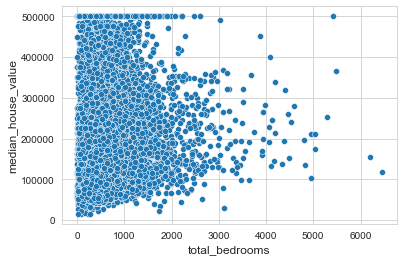

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


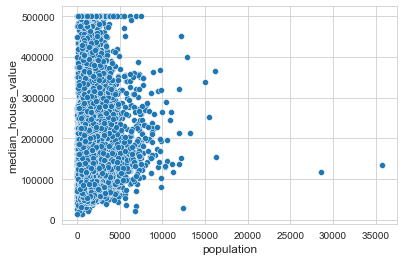

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


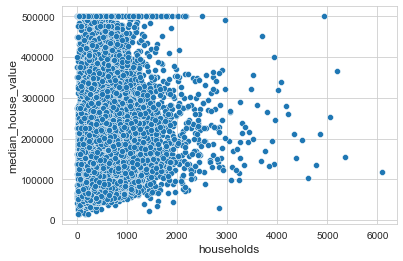

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


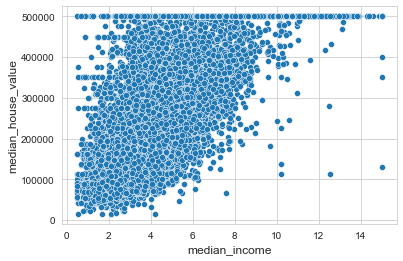

In [48]:
for i in x:
    sns.scatterplot(x[i],y.median_house_value)
    plt.xlabel(i, size=12)
    plt.ylabel("median_house_value", size=12)
    plt.show()

<AxesSubplot:>

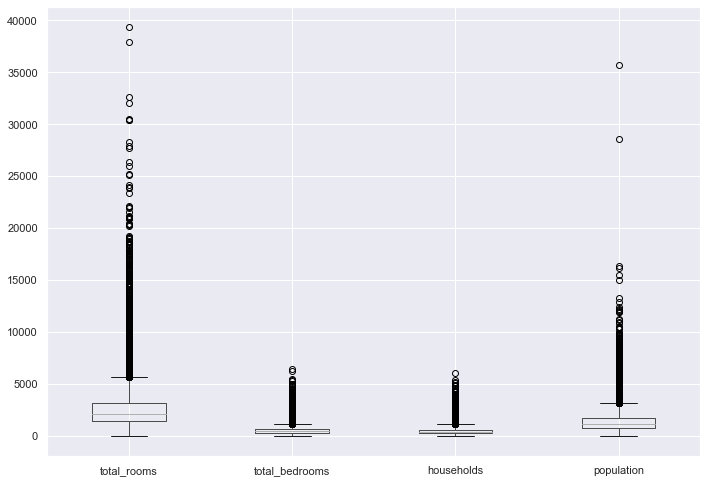

In [49]:
df_box = housing[["total_rooms","total_bedrooms","households", "population"]]

sns.set(rc={'figure.figsize':(11.7,8.27)})
df_box.boxplot()

<AxesSubplot:title={'center':'total_rooms'}, xlabel='ocean_proximity'>

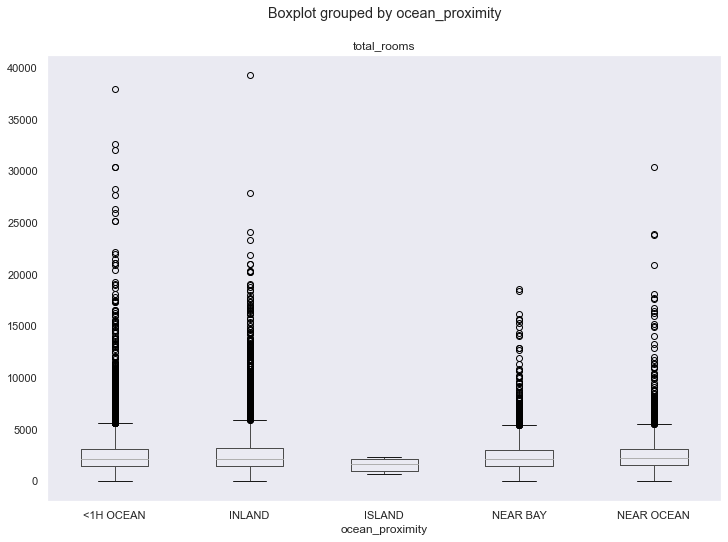

In [50]:
housing.boxplot(by ='ocean_proximity', column =['total_rooms'], grid = False)

<AxesSubplot:title={'center':'total_bedrooms'}, xlabel='ocean_proximity'>

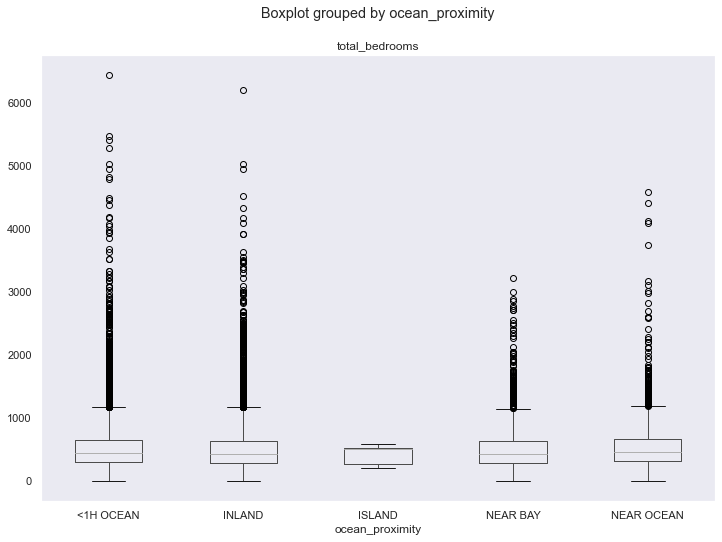

In [51]:
housing.boxplot(by ='ocean_proximity', column =['total_bedrooms'], grid = False)

<AxesSubplot:title={'center':'population'}, xlabel='ocean_proximity'>

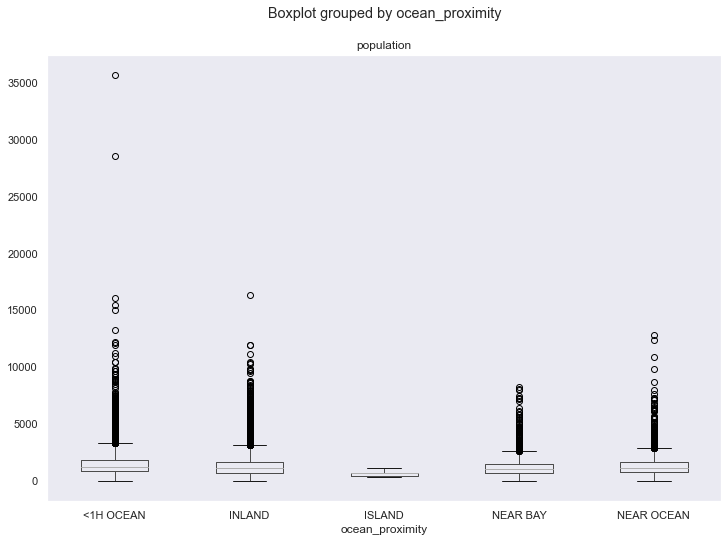

In [52]:
housing.boxplot(by ='ocean_proximity', column =['population'], grid = False)

<AxesSubplot:title={'center':'median_house_value'}, xlabel='ocean_proximity'>

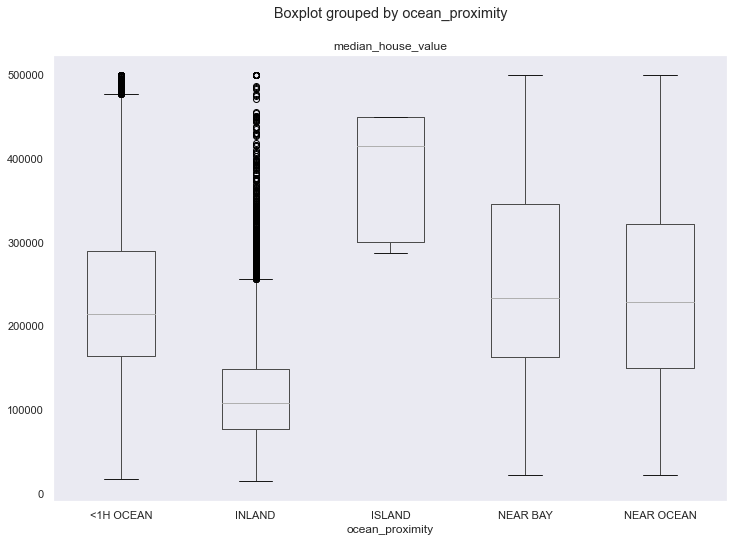

In [53]:
housing.boxplot(by ='ocean_proximity', column =['median_house_value'], grid = False)

<AxesSubplot:title={'center':'median_income'}, xlabel='ocean_proximity'>

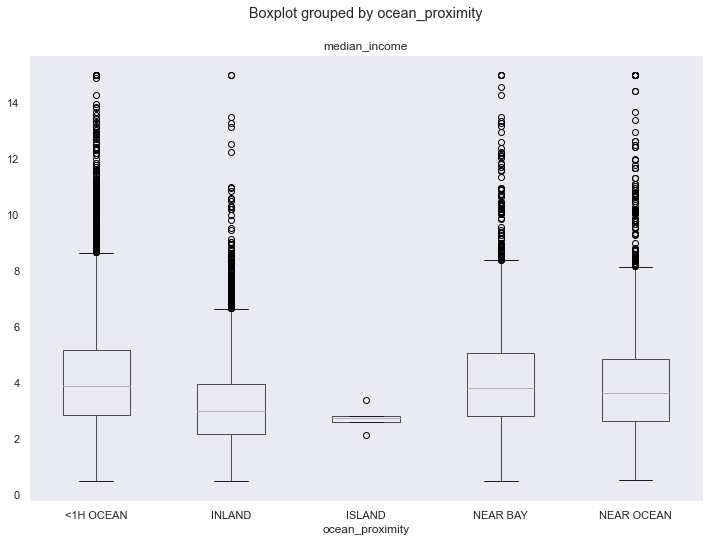

In [54]:
housing.boxplot(by ='ocean_proximity', column =['median_income'], grid = False)

#### Feature Scaling

#### correlation and covariance matrix

In [55]:
matrix =  housing.corr()
print("Correlation matrix is : ")
print(matrix)

Correlation matrix is : 
                    longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924616           -0.109357     0.045480   
latitude            -0.924616  1.000000            0.011899    -0.036667   
housing_median_age  -0.109357  0.011899            1.000000    -0.360628   
total_rooms          0.045480 -0.036667           -0.360628     1.000000   
total_bedrooms       0.069608 -0.066983           -0.320451     0.930380   
population           0.100270 -0.108997           -0.295787     0.857281   
households           0.056513 -0.071774           -0.302768     0.918992   
median_income       -0.015550 -0.079626           -0.118278     0.197882   
median_house_value  -0.045398 -0.144638            0.106432     0.133294   

                    total_bedrooms  population  households  median_income  \
longitude                 0.069608    0.100270    0.056513      -0.015550   
latitude                 -0.066983   -0.108997   -0.071774  

<AxesSubplot:>

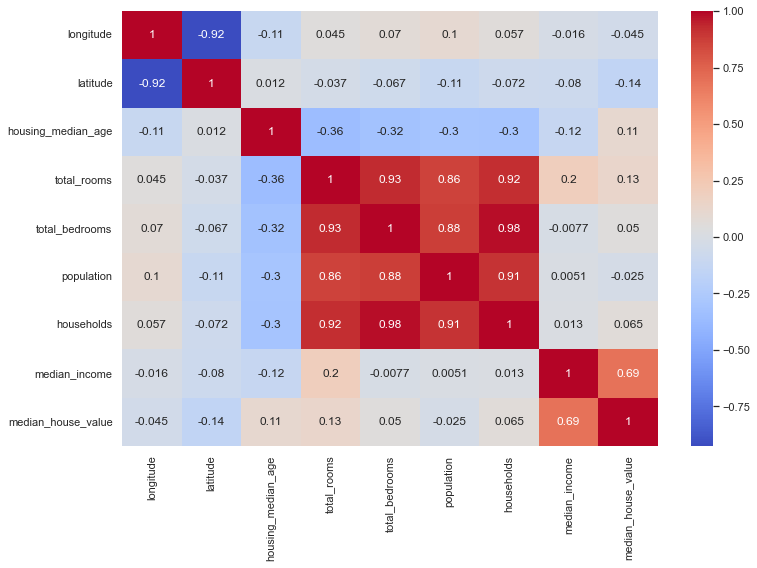

In [56]:
plt.figure(figsize = (12,8))
sns.heatmap(housing.corr() , annot = True , cmap = "coolwarm")

In [57]:
housing.cov()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,4.014324,-3.957670,-2.758919,1.991284e+02,5.876851e+01,2.276609e+02,4.328688e+01,-0.059174,-1.049990e+04
latitude,-3.957670,4.563981,0.320091,-1.711788e+02,-6.029962e+01,-2.638746e+02,-5.861970e+01,-0.323087,-3.566933e+04
housing_median_age,-2.758919,0.320091,158.553558,-9.923225e+03,-1.700313e+03,-4.220631e+03,-1.457476e+03,-2.828672,1.547036e+05
total_rooms,199.128445,-171.178818,-9923.224538,4.775403e+06,8.567306e+05,2.122942e+06,7.677502e+05,821.299996,3.362452e+07
total_bedrooms,58.768508,-60.299623,-1700.312817,8.567306e+05,1.775654e+05,4.191391e+05,1.578295e+05,-6.180851,2.416878e+06
population,227.660858,-263.874646,-4220.630517,2.122942e+06,4.191391e+05,1.284161e+06,3.930154e+05,10.947904,-3.309526e+06
households,43.286878,-58.619704,-1457.475788,7.677502e+05,1.578295e+05,3.930154e+05,1.461527e+05,9.754316,2.863815e+06
median_income,-0.059174,-0.323087,-2.828672,8.213000e+02,-6.180851e+00,1.094790e+01,9.754316e+00,3.607307,1.509192e+05
median_house_value,-10499.897668,-35669.333210,154703.602850,3.362452e+07,2.416878e+06,-3.309526e+06,2.863815e+06,150919.151760,1.332539e+10


<AxesSubplot:>

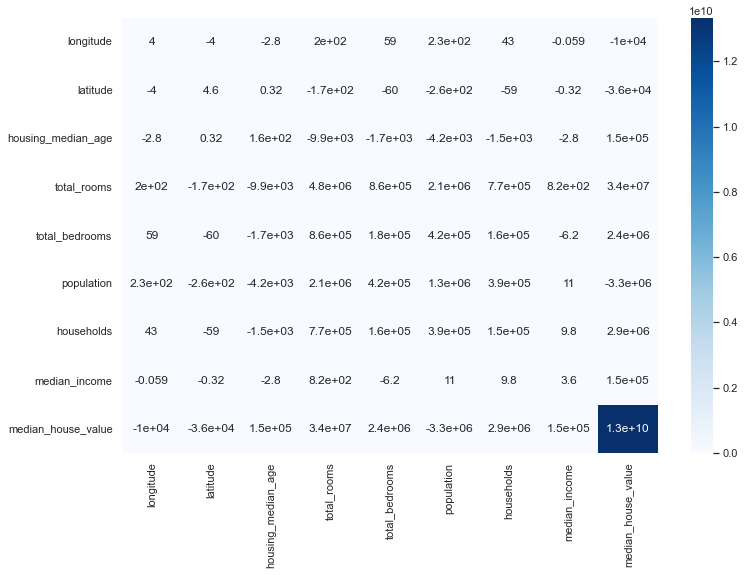

In [58]:
plt.figure(figsize = (12,8))
sns.heatmap(housing.cov() , annot = True , cmap = "Blues")

## Insights :